# Titanic - Projeto Final

## Introdução

"O RMS Titanic foi um navio de passageiros britânico operado pela White Star Line e construído pelos estaleiros da Harland and Wolff em Belfast. Foi a segunda embarcação da Classe Olympic de transatlânticos depois do RMS Olympic e seguido pelo HMHS Britannic[...]

A embarcação partiu em sua viagem inaugural /de Southampton para Nova Iorque em 10 de abril de 1912, no caminho passando em Cherbourg-Octeville na França e por Queenstown na Irlanda. Ele colidiu com um iceberg às 23h40min do dia 14 de abril e afundou na madrugada do dia seguinte com mais de 1 500 pessoas a bordo, sendo um dos maiores desastres marítimos em tempos de paz de toda a históri[...]."  <[fonte](https://pt.wikipedia.org/wiki/RMS_Titanic)>

Os dados que serão analisados são do titanic. O objetio deste realizar é realizar a análise de vitimas e fazer questionamentos em relação aos dados disponibilados pela udacity.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df_titanic = pd.read_csv('titanic-data-6.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Perguntas

Crie pelo menos cinto perguntas.
Pelo menos três dessas perguntas devem ser compostas (a junção de duas ou mais colunas).

- 1. Qual a idade média dos sobreviventes da primeira classe que embarcaram em Cherbourg?
- 2. Dos sobreviventes qual era a porcentagem de mulheres que sobreviveram ao desastre, e dessas de qual a porcentagem por classe social?
- 3. Dos passageiros embarcados por região, qual teve mais sobreviventes ?
- 4. Qual é a media de idade de sobreviventes em cada classe social, e daqueles que faleceram no naufragio?
- 5. Qual é a classe das pessoas que sobreviveram ?

Explique por que dessa pergunta, o que motivou ela.

## Dados úteis
- Excluindo valores nulos da base
- Definindo a faixa etária dos passageiros
- Definindo uma coluna de não sobreviventes

In [3]:
df_titanic.dropna(inplace=True, how='any')
df_titanic["faixa_etaria"] = pd.cut(df_titanic.Age, [0, 14, 50, 150], labels=["criancas", "adultos", "idosos"])
df_titanic['SurvivedNo'] = df_titanic['Survived'].map({0:1,1:0})

## Respondendo
### 1 Qual a idade média dos sobreviventes da primeira classe que embarcaram em Cherbourg?

[Text(0, 0.5, 'Sobreviventes'), Text(0.5, 0, 'Faixa Etaira')]

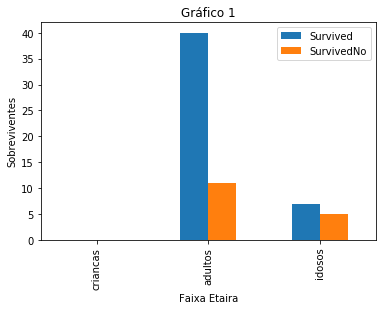

In [37]:
df_titanic.query("Pclass == 1 & Embarked == 'C'").groupby('faixa_etaria')[['Survived', 'SurvivedNo']].sum().plot.bar(
    title='Gráfico 1').set(
    ylabel='Sobreviventes', 
    xlabel='Faixa Etaira')

Com o gráfico acima podemos observar que ouve mais sobreviventes adultos do que idosos, e que não teve crianças sobreviventes. Isso pode ser um incossistencia na base de dados, onde ouve campos nulos excluidos

In [38]:
df_titanic.query("Pclass == 1 & Embarked == 'C'").groupby('faixa_etaria')[['Survived', 'SurvivedNo']].sum()

,Survived,SurvivedNo
faixa_etaria,,
criancas,0,0
adultos,40,11
idosos,7,5


### 2. Dos sobreviventes qual era a porcentagem de mulheres que sobreviveram ao desastre, e dessas de qual a porcentagem por classe social?

[Text(0, 0.5, 'Sobreviventes'), Text(0.5, 0, 'Classe e Sexo')]

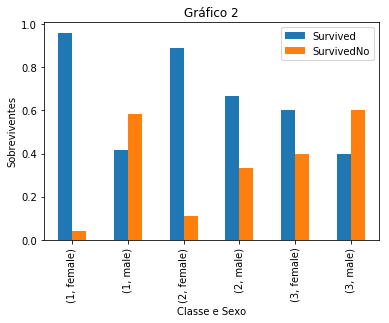

In [30]:
df_titanic.groupby(['Pclass', 'Sex']).mean()[['Survived', 'SurvivedNo']].plot.bar(title="Gráfico 2").set(
    ylabel='Sobreviventes', 
    xlabel='Classe e Sexo')

Com o gráfico acima podemos observar que ouve mais mulheres salvas da primeira classe em relação as outras classes

### 3. Dos passageiros embarcados por região, qual teve mais sobreviventes ?

[Text(0, 0.5, 'Embarcado em')]

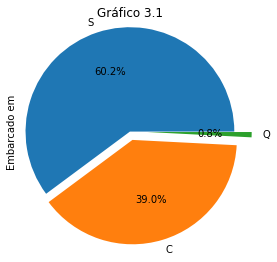

In [45]:
df_titanic.query('Survived == 1')['Embarked'].value_counts().plot.pie(
    explode = (0, .1, .2), 
    radius = 1.2, 
    autopct = '%1.1f%%',
    title="Gráfico 3.1").set(
    ylabel='Embarcado em')

No gráfico acima podemos observar que ouve mais sobreviventes de Southampton do que Queenstown

[Text(0, 0.5, 'Sobreviventes'), Text(0.5, 0, 'Embarque e Sexo')]

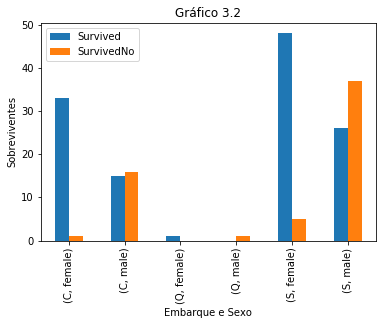

In [46]:
df_titanic.groupby(['Embarked', 'Sex']).sum()[['Survived', 'SurvivedNo']].plot.bar(title="Gráfico 3.2").set(
    ylabel='Sobreviventes', 
    xlabel='Embarque e Sexo')

Neste gráfico observamos que ouve que existe os dois extremos de mulhetes que sobreviveram homens que vieram a falecer no naufrágio 

### 4. Qual é a media de idade de sobreviventes ?

[Text(0, 0.5, 'Sobreviventes'), Text(0.5, 0, 'Faixa Etaira')]

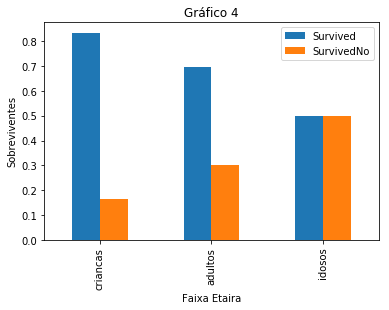

In [47]:
df_titanic.groupby('faixa_etaria')[['Survived', 'SurvivedNo']].mean().plot.bar(title="Gráfico 4").set(
    ylabel='Sobreviventes', 
    xlabel='Faixa Etaira')

Aqui obtivemos a media de sobreviventes de cada faixa etaria, sendo que as crianças teve mais sobreviventes 

### 5.Qual é a classe das pessoas que sobreviveram ?

[Text(0, 0.5, 'Classe')]

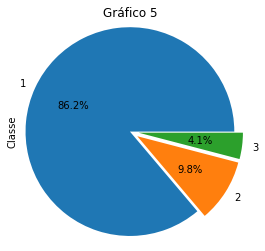

In [50]:
df_titanic.query('Survived == 1')['Pclass'].value_counts().plot.pie(
    explode = (0, .1, .1), 
    radius = 1.2, 
    autopct = '%1.1f%%',
    title="Gráfico 5").set(
    ylabel='Classe')

Neste gráfico podemos observar que ouve mais sobreviventes da primeria classe

## Conclusão
Com a análise, foi possível observar que a primeira classe teve mais sobreviventes que as demais classes e que ouve mais mulheres sobreviventes do que homens, já que em casos como esse é procedimento básico salvar mulheres e crianças em primeiro caso.
Pode haver uma inconsistência nos dados sendo por conta de valores nulos, mas nada muito agravante em ralação a análise realizada.

Por conta da base de dados não esta com todas as informações preenchidas, pode ocorrer uma inconsistências nos dados, isso pode ser observado no gráfico 1, onde não ouve crianças vivas ou mortas

## Bibliografia

Escreva os links que vocês usaram para escrever esse projeto.

[Pie](https://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py)